In [1]:
from scipy.fft import fft, fftfreq, fftshift, ifft
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import helpers
import plots
import iaf
import scipy

In [3]:
dur = 0.1
dt = 1e-4
t = np.arange(0, dur, dt)
t_0_centered = np.arange(-dur/2, dur/2, dt)

w_0 = 1

alpha_0 = w_0*1j
alpha_1 = -w_0*1j
L = 50 * dt

In [4]:
def phi_kernel(t, alpha_0, alpha_1, L, dt):
    nb_samples_in_L = int(L/dt)
    
    N = t.shape[0]
    N_2 = int(N/2)
    
    minus_L_idx = -nb_samples_in_L
    minus_L_2_idx = -int(nb_samples_in_L/2)
    
    t_0 = t[N_2 + minus_L_idx : N_2 + minus_L_2_idx]
    t_1 = t[N_2 + minus_L_2_idx : N_2]
    
    phi_0 = (np.exp(alpha_1-alpha_0)/(alpha_1-alpha_0)) * np.exp(-alpha_0*t_0)
    phi_0 = phi_0 + (np.exp(-alpha_1+alpha_0)/(-alpha_1+alpha_0)) * np.exp(-alpha_1*t_0)
    
    phi_1 = np.exp(-alpha_0*t_1)/(alpha_0-alpha_1) + np.exp(-alpha_1*t_1)/(alpha_1-alpha_0)
    
    result = np.zeros(N)
    
    result[N_2 + minus_L_idx : N_2 + minus_L_2_idx] = phi_0
    result[N_2 + minus_L_2_idx : N_2] = phi_1
    
    return result

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


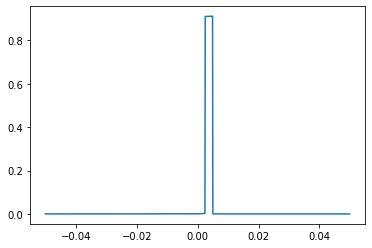

In [5]:
phi = phi_kernel(t_0_centered, alpha_0, alpha_1, L, dt)
plt.plot(t_0_centered, np.flip(phi))

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in cdouble_scalars
  del sys.path[0]
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in cdouble_scalars
  del sys.path[0]
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in cdouble_scalars
  
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in cdouble_scalars
  
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in m

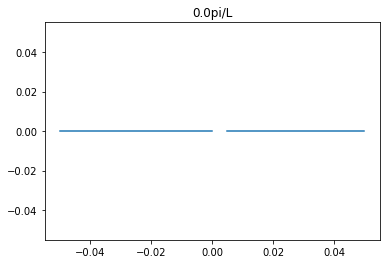

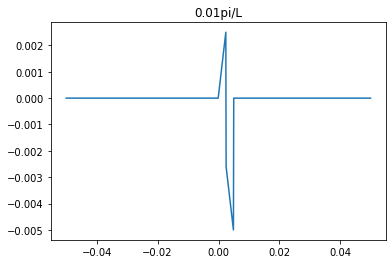

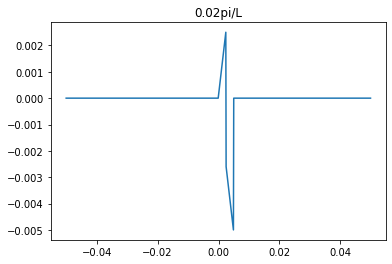

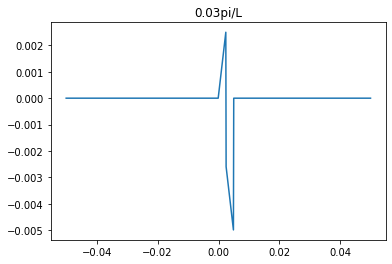

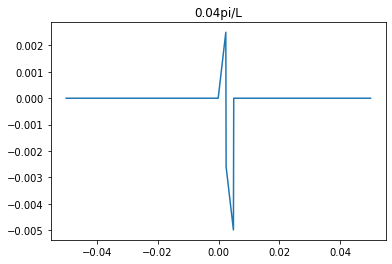

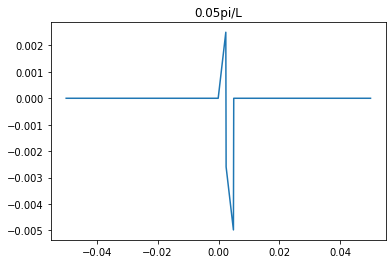

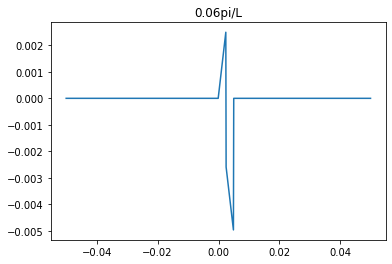

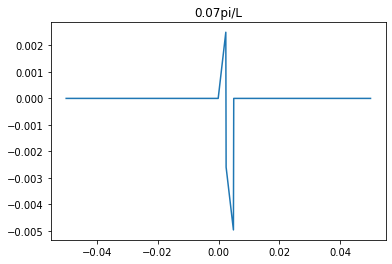

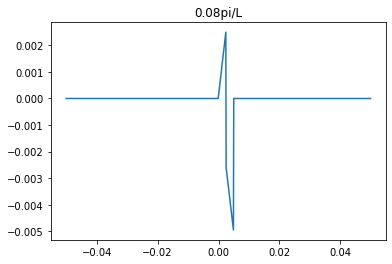

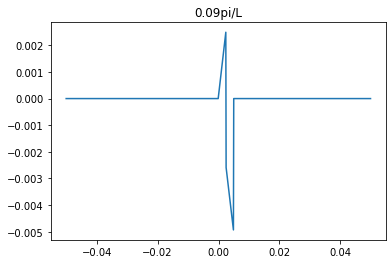

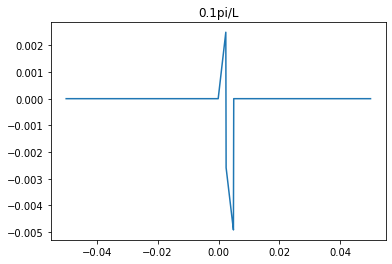

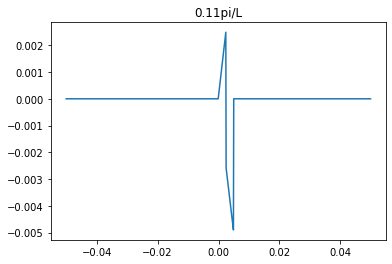

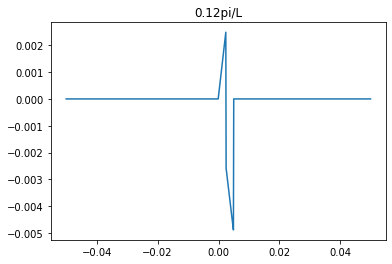

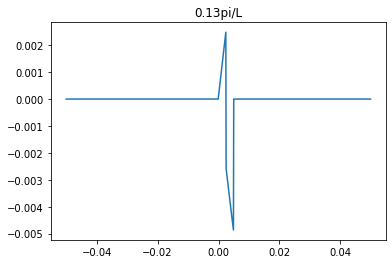

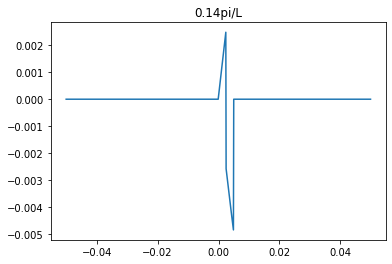

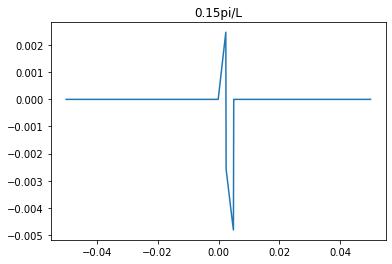

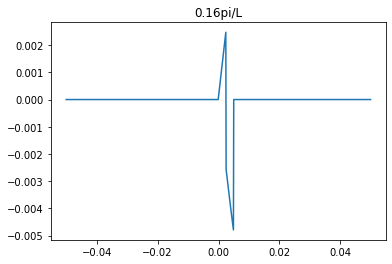

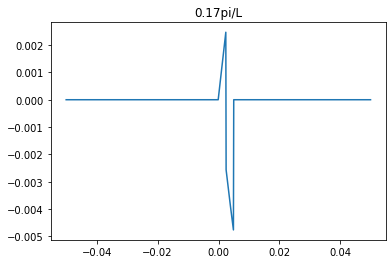

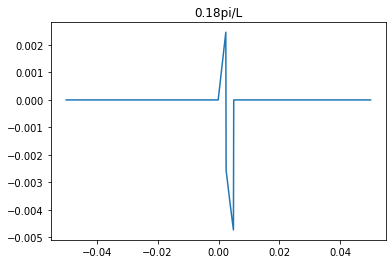

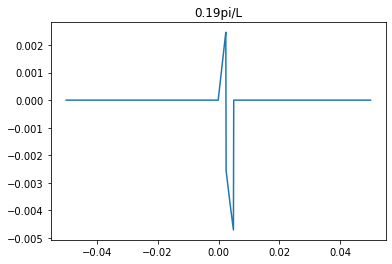

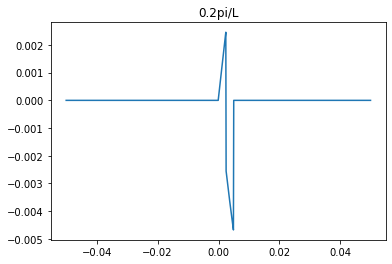

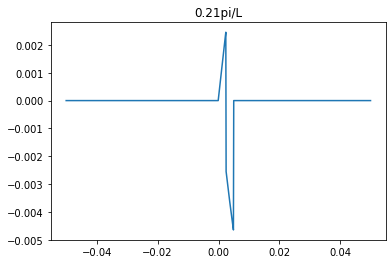

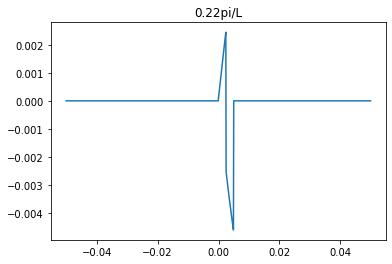

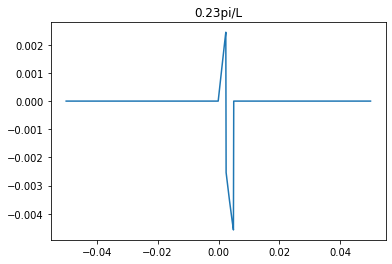

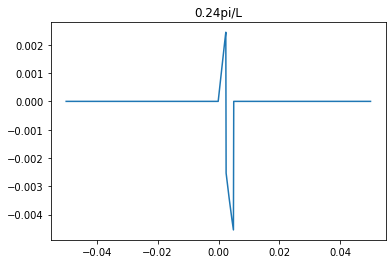

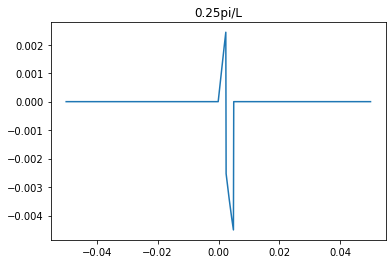

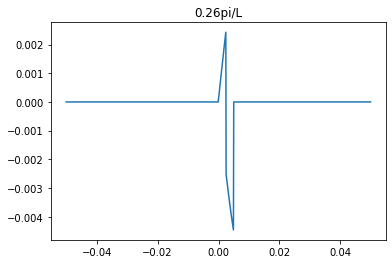

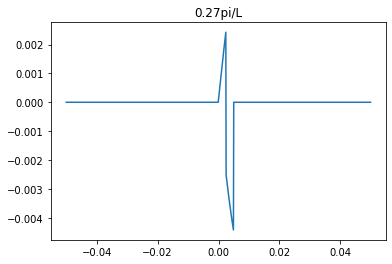

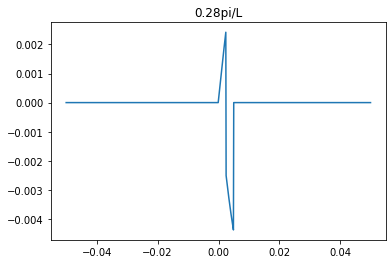

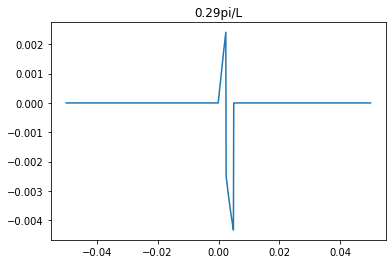

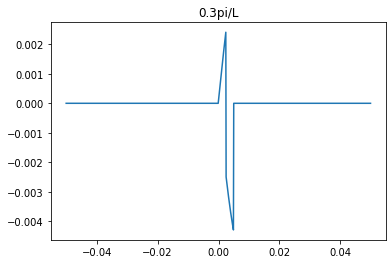

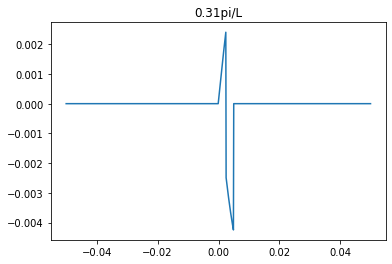

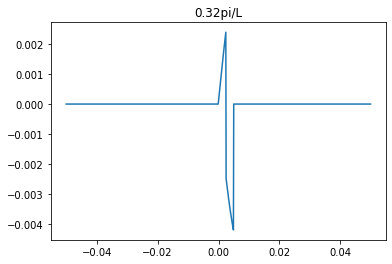

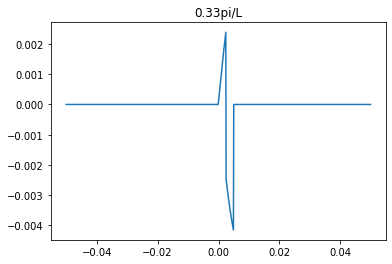

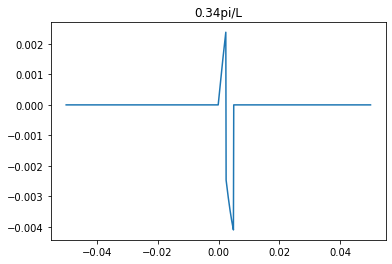

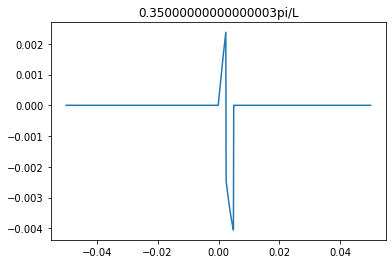

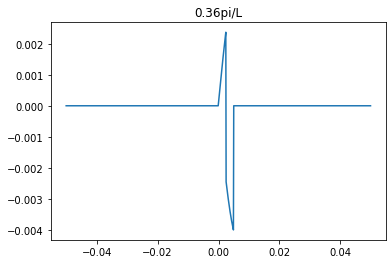

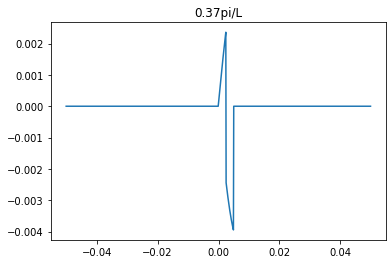

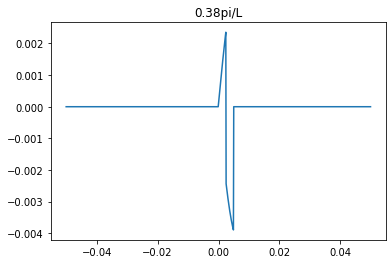

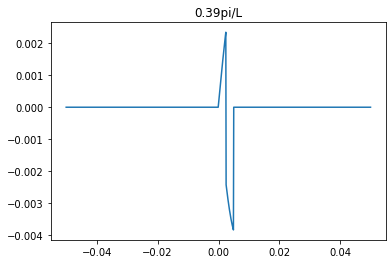

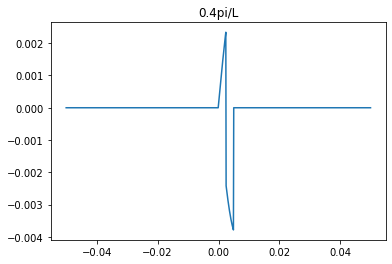

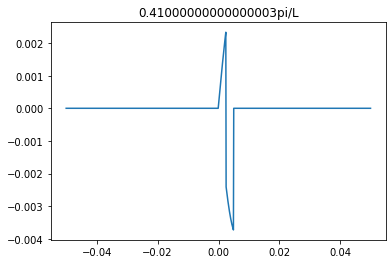

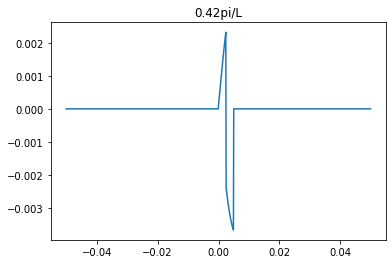

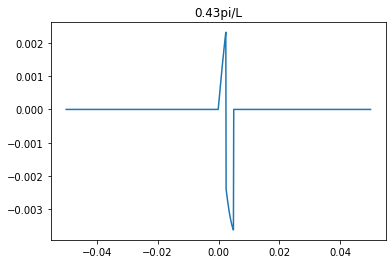

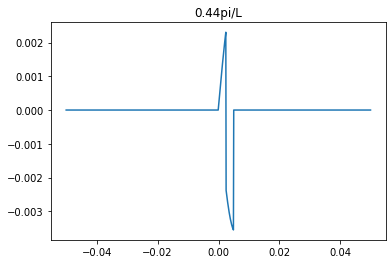

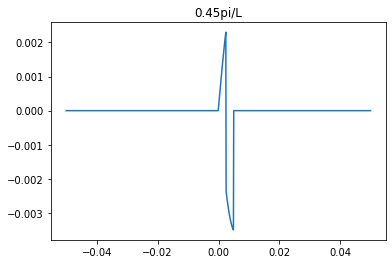

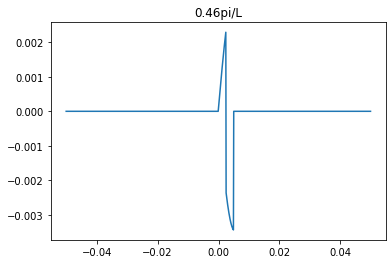

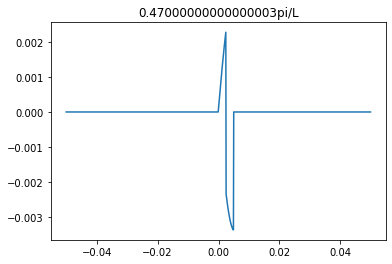

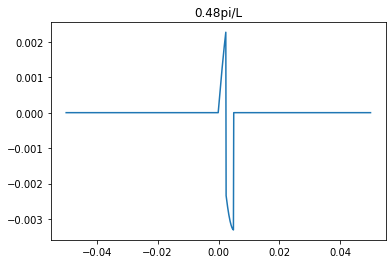

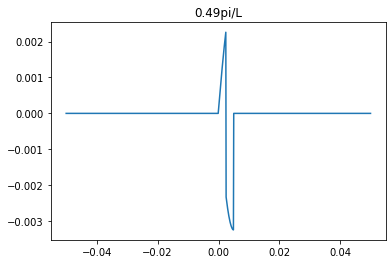

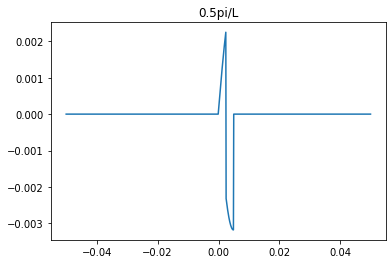

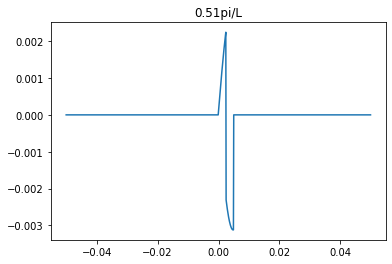

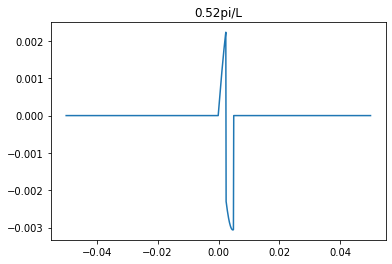

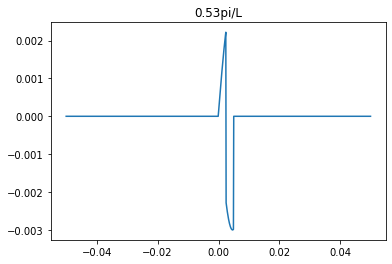

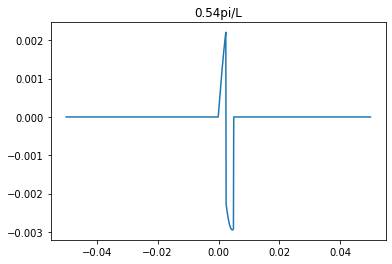

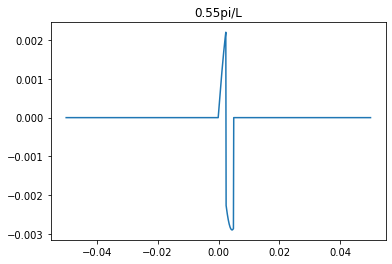

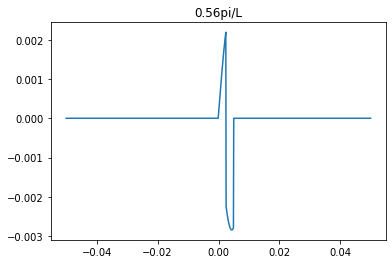

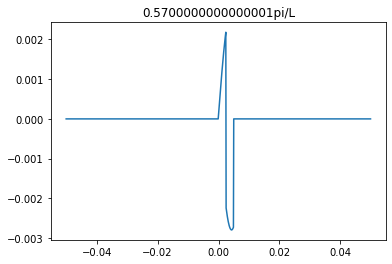

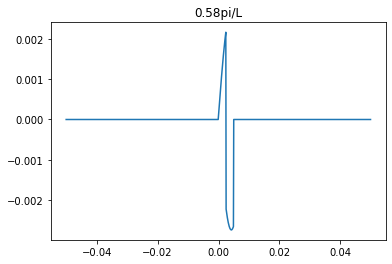

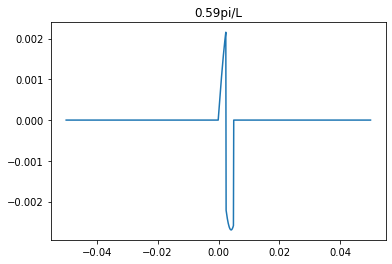

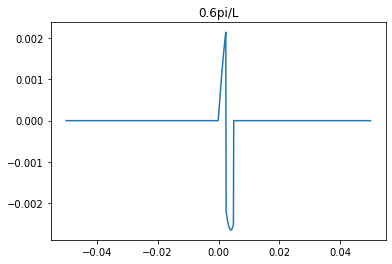

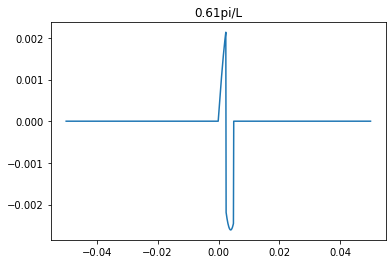

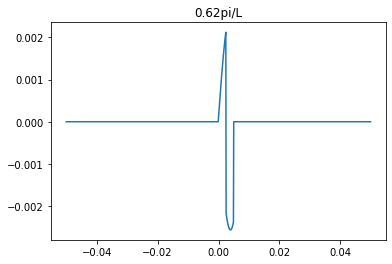

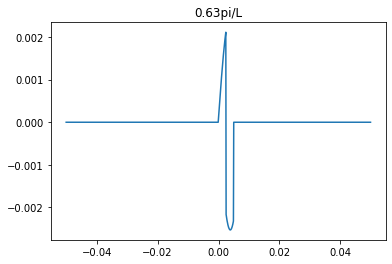

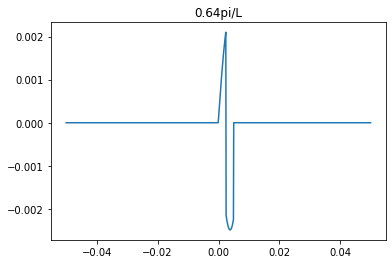

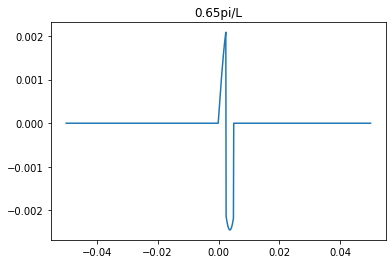

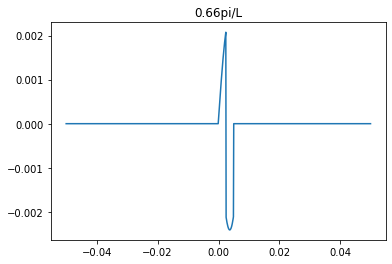

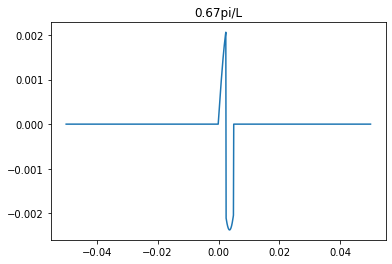

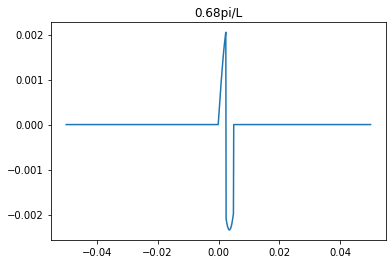

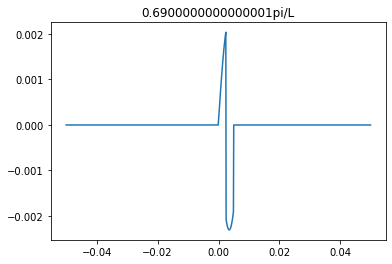

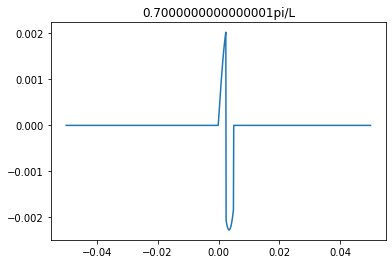

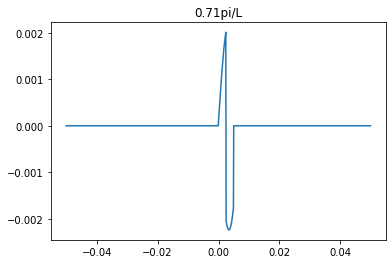

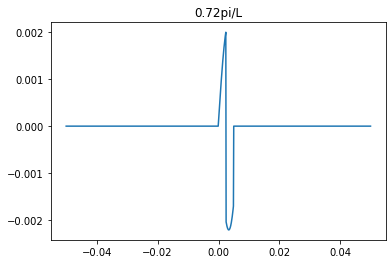

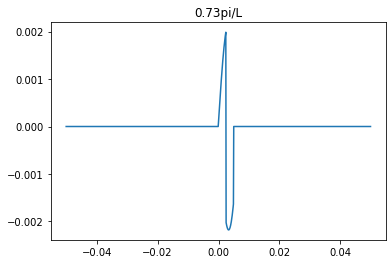

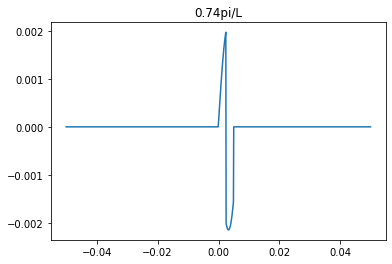

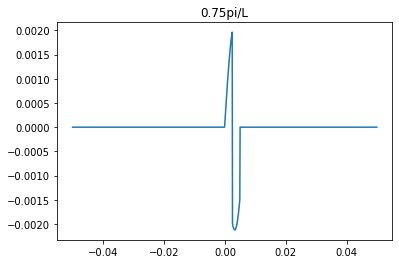

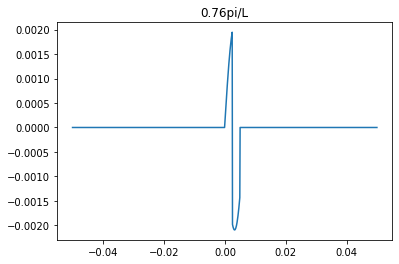

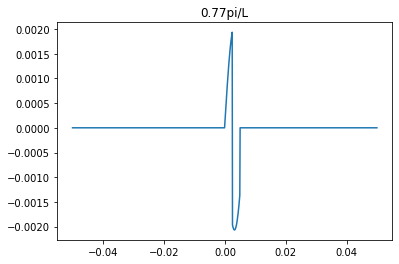

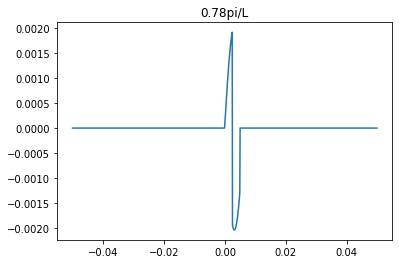

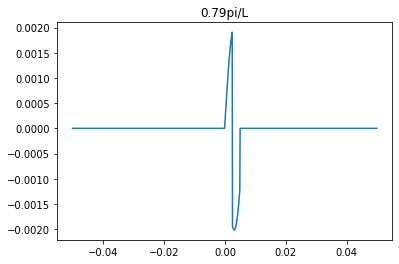

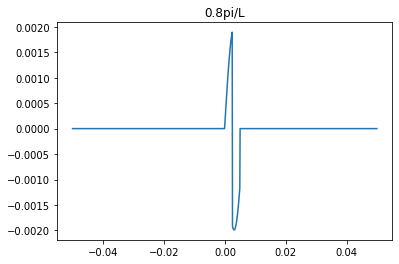

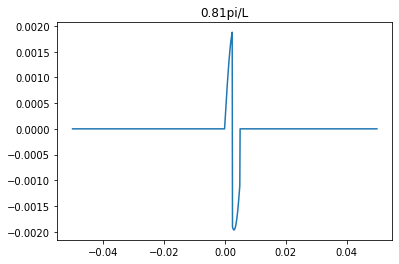

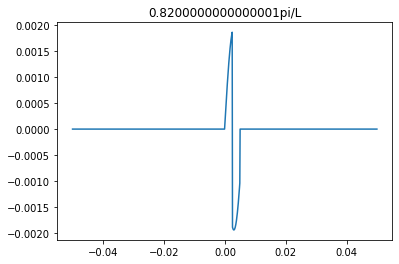

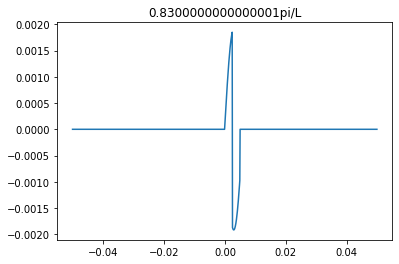

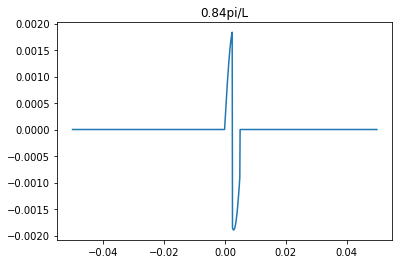

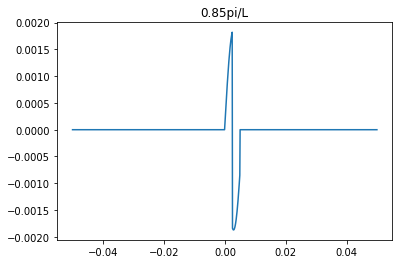

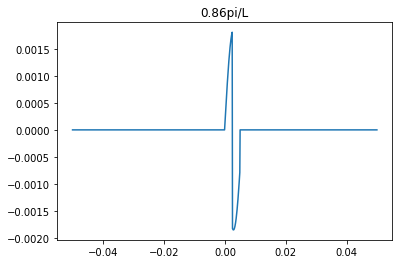

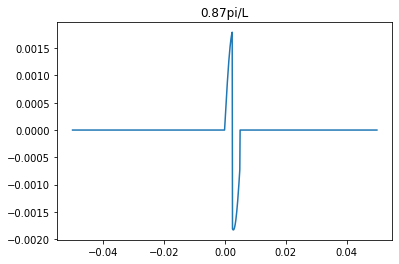

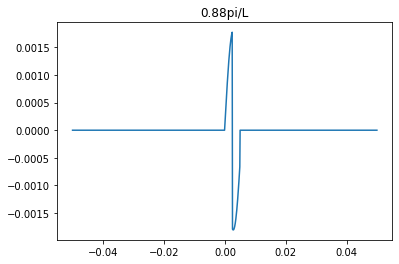

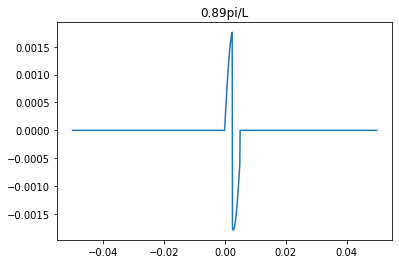

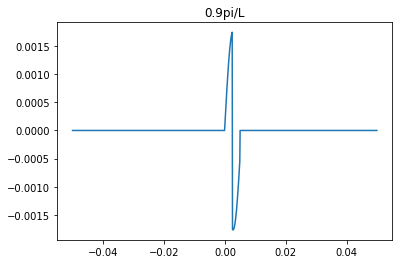

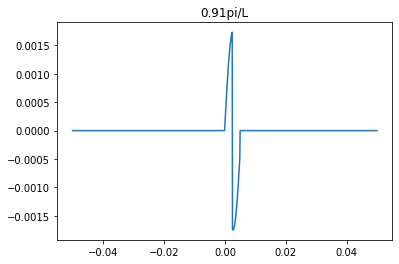

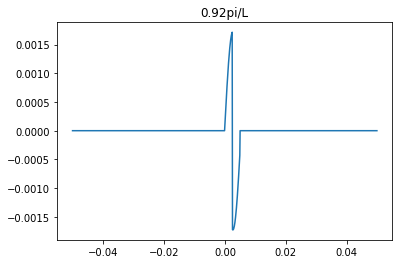

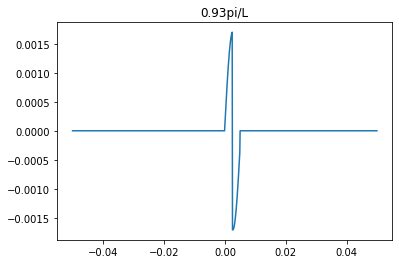

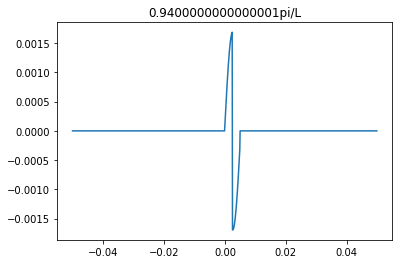

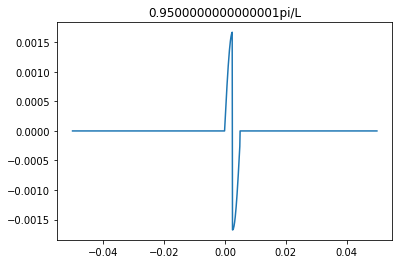

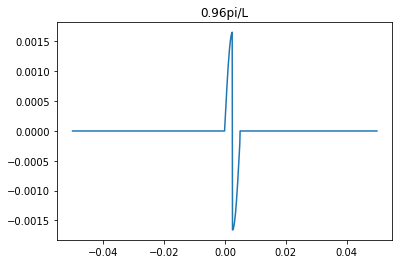

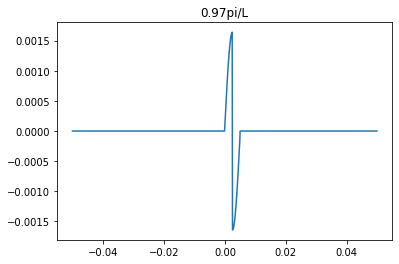

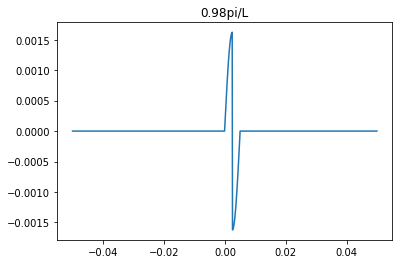

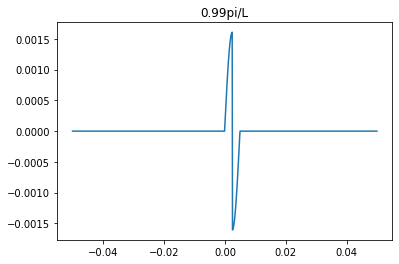

In [6]:
ws = np.arange(0, 1, 0.01)

for w in ws :
    alpha_0 = w*np.pi*1j/L
    alpha_1 = -w*np.pi*1j/L
    phi = phi_kernel(t_0_centered, alpha_0, alpha_1, L, dt)
    plt.figure()
    plt.plot(t_0_centered, np.flip(phi))
    plt.title(str(w) + "pi/L")
    plt.show

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


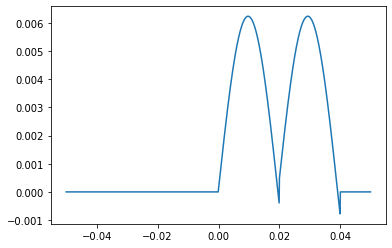

In [11]:
w_0 = 1.02*np.pi/L

alpha_0 = w_0*1j
alpha_1 = -w_0*1j
L = 400 * dt

phi = phi_kernel(t_0_centered, alpha_0, alpha_1, L, dt)

plt.plot(t_0_centered, np.flip(phi))

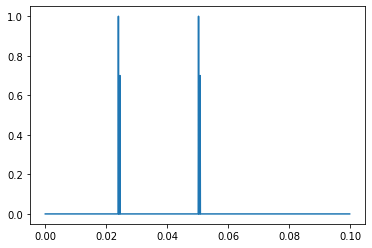

In [8]:
burst_1 = scipy.signal.unit_impulse(len(t), idx=[240, 503])
burst_2 = scipy.signal.unit_impulse(len(t), idx=[245, 508])
signal = burst_1 + 0.7 * burst_2
plt.plot(t, signal)

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  """Entry point for launching an IPython kernel.


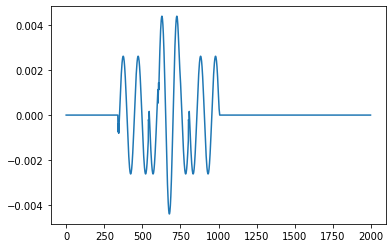

In [9]:
convolved = scipy.convolve(signal, phi)
plt.plot(convolved)